In [1]:
#Metin Görselleştirme

In [2]:
import pandas as pd
data = pd.read_csv("train.tsv", sep = "\t")

In [3]:
data.head()#sentiment değerleri

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
#buyuk-kucuk donusumu
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [6]:
#noktalama işaretleri
data['Phrase'] = data['Phrase'].str.replace('[^\w\s]','')

In [7]:
#sayılar
data['Phrase'] = data['Phrase'].str.replace('\d','')

In [8]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tolga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#seyreklerin silinmesi
sil = pd.Series(' '.join(data['Phrase']).split()).value_counts()[-1000:]
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [10]:
#lemmi
from textblob import Word
#nltk.download('wordnet')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [11]:
data['Phrase'].head(10)
data = data[0:75000]
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series demonstrating adage good goose also goo...,1
1,2,1,series demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2
...,...,...,...,...
74995,74996,3846,pressed succumb,2
74996,74997,3846,succumb,2
74997,74998,3846,succumb,2
74998,74999,3846,call wild,2


# Terim Frekansı(tf):metin içerisinden özellik çıkarmak adına kullanıcaz

In [20]:
tf1 = (data["Phrase"]).apply(lambda x: 
                             pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [22]:
tf1.columns = ["words","tf"]

In [23]:
tf1.head()#her bir kelimenin frekansları

,words,tf
0,good,1033.0
1,goose,34.0
2,occasionally,102.0
3,story,1309.0
4,also,318.0


In [27]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9305 entries, 0 to 9304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   9305 non-null   object 
 1   tf      9305 non-null   float64
dtypes: float64(1), object(1)
memory usage: 145.5+ KB


In [28]:
tf1.nunique()

words    9305
tf        325
dtype: int64

In [ ]:
#Barplot

In [29]:
a = tf1[tf1["tf"]>1000]

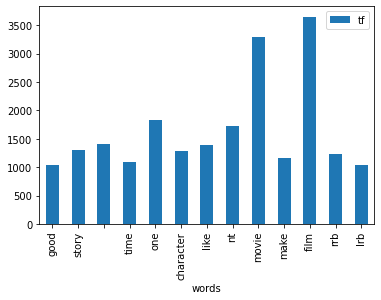

In [30]:
a.plot.bar(x = "words", y = "tf");

In [32]:
#Wordcloud

In [33]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [35]:
text = data["Phrase"][0] #tek bir yorumu görüntülicez

In [36]:
wordcloud = WordCloud().generate(text)

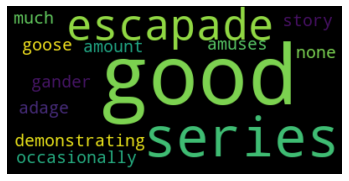

In [39]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

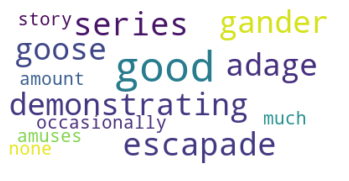

In [42]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100,
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [43]:
#tüm hepsi

In [44]:
text = " ".join(i for i in data.Phrase)

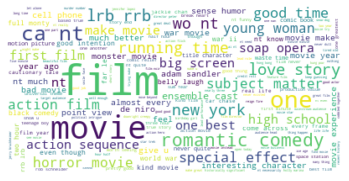

In [47]:
wordcloud = WordCloud(max_font_size = 50,
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [12]:
wordcloud = WordCloud(max_font_size = 50,
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [49]:
#Şablonlara Göre Wordcloud

In [50]:
turkey_mask = np.array(Image.open("bayrak.png"))
turkey_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

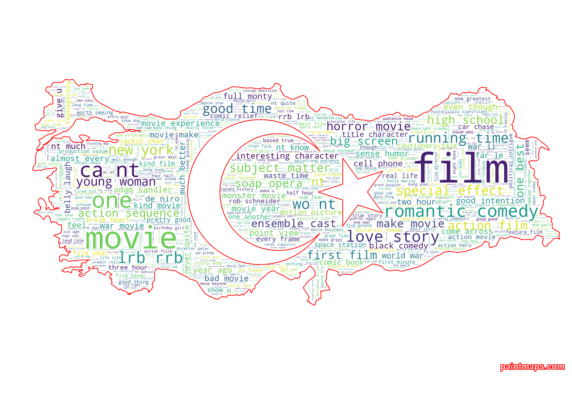

In [51]:
wordcloud = WordCloud(background_color = "white", max_words = 1000, mask = turkey_mask, contour_width=3, contour_color="red").generate(text)
wordcloud.to_file("turkey.png")
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()